In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [96]:
def display(img, cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

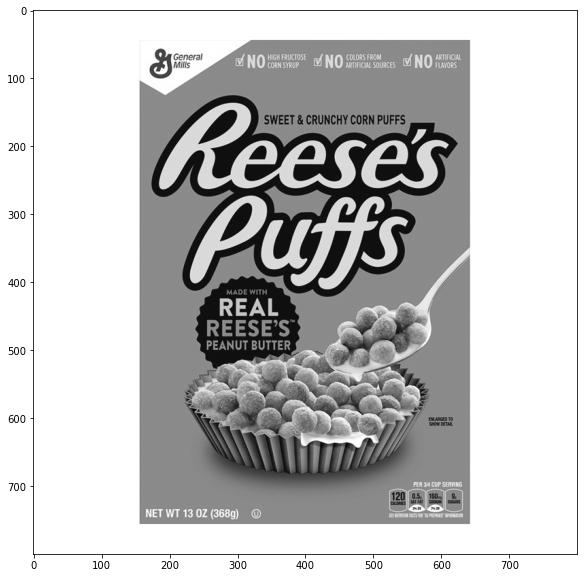

In [97]:
reeses = cv2.imread("reeses_puffs.jpg", 0)

display(img=reeses)


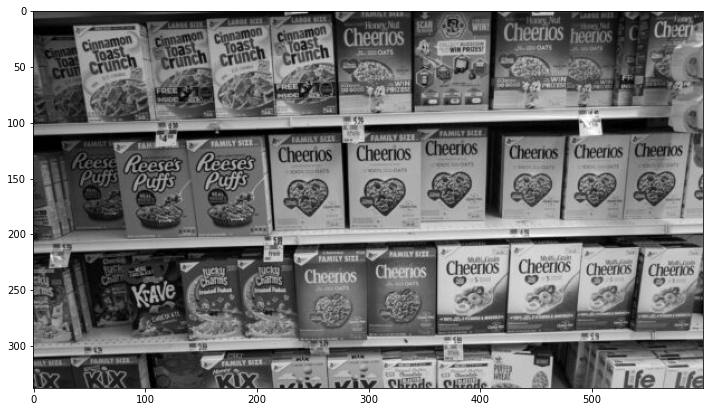

In [98]:
cereals = cv2.imread("reeses_isles.jpg" , 0)
display(cereals)

## ORB descriptors

In [99]:
orb = cv2.ORB_create()

In [100]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)


In [101]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [102]:
matches  = bf.match(des1, des2)

In [103]:
matches[1].distance

69.0

In [104]:
matches = sorted(matches, key=lambda x: x.distance)

In [105]:
reeses_match = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:30], None, flags=2)

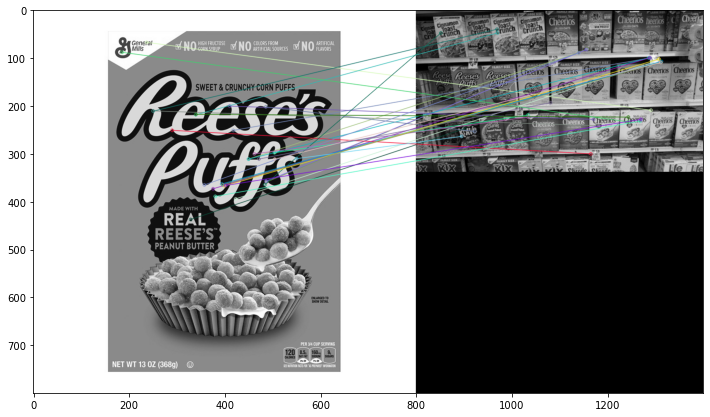

In [106]:
display(reeses_match)

## SIFT descriptors 

In [107]:
sift  = cv2.xfeatures2d.SIFT_create()


In [108]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)


In [109]:
bf = cv2.BFMatcher()

In [110]:
matches = bf.knnMatch(des1, des2, k=2)
matches[:2]

[[<DMatch 000001CC66F54890>, <DMatch 000001CC66F54030>],
 [<DMatch 000001CC66F54350>, <DMatch 000001CC66F54EF0>]]

In [111]:
good = []
# RATION MATCH1 < 75 % MATCH 2
# if match1 is less than 75 % of match 2 than lets keep that descriptor
for match1, match2 in matches:
    if match1.distance < 0.80*match2.distance:
        good.append([match1])

In [112]:
len(good)

66

In [113]:
len(matches)

1667

In [114]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

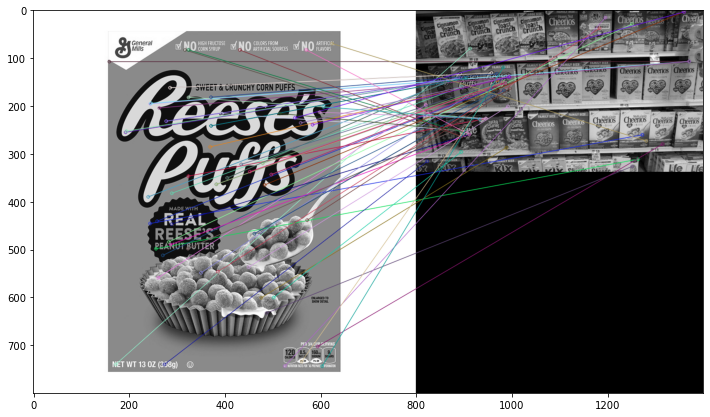

In [115]:
display(sift_matches)

### FLANN descriptors

In [116]:
sift = cv2.xfeatures2d.SIFT_create()

In [117]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)


In [118]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params  = dict(algorithm=FLANN_INDEX_KDTREE)
search_params = dict(checks=50) 

In [119]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [120]:
matches = flann.knnMatch(des1, des2, k=2)

In [121]:
matchesMask = [[0,0] for i in range(len(matches))]


In [122]:
# matchesMask

In [123]:
# good = []
# # RATION MATCH1 < 75 % MATCH 2
# # if match1 is less than 75 % of match 2 than lets keep that descriptor
# for match1, match2 in matches:
#     if match1.distance < 0.80*match2.distance:
#         good.append([match1])


for i,( match1, match2) in enumerate(matches):
    if match1.distance < 0.80*match2.distance:
        matchesMask[i] = [1,0]


In [126]:
draw_params =  dict(matchColor=(0,255,0), 
                   singlePointColor=(255,0,0),
                   matchesMask=matchesMask,
                   flags=0)

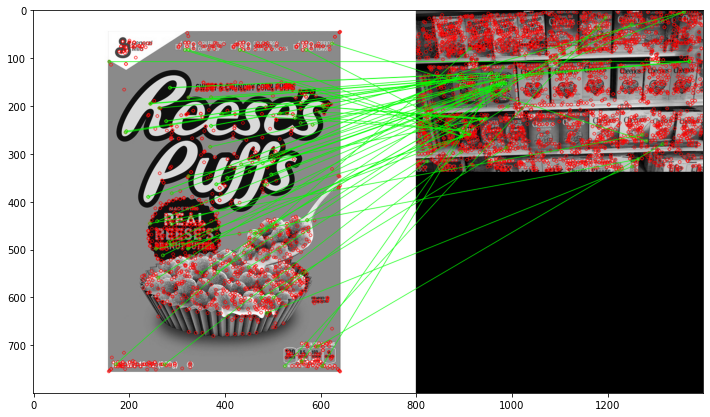

In [127]:
# flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
flann_matches = cv2.drawMatchesKnn(
    reeses, kp1, cereals, kp2, matches, None, **draw_params)

display(flann_matches)
